# 乳腺癌预测
> 王紫薇 1901211018

## 1.简介

如今机器学习广泛应用于现代医学领域，如辅助癌症的筛查和诊断。

### 1.1问题介绍

本次作业基于给定的患者乳腺部位检查情况，对患者是否患有乳腺癌进行预测。数据包括mean radius,mean texture,mean perimeter等30种特征。

### 1.2数据集分析
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

#读取并划分变量
df = pd.read_csv('breast_cancer.csv')
y_df = df['type']
x_df = df.drop('type',axis = 1)

In [2]:
y_df.value_counts()

1    357
0    212
Name: type, dtype: int64

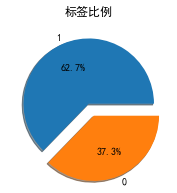

In [3]:
pie_plot = y_df.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True,figsize=(3,3))
pie_plot.set_title('标签比例')
pie_plot.set_ylabel('')
plt.show()

数据集一共有569组31列，最后一列 type 表示是否患有乳腺癌（0表示不患乳腺癌，1表示患乳腺癌），共有个357正样本（type=1），占比62.7%；212个负样本（type=0），占比37.3%。

## 2.程序实现说明
### 2.1 读取并划分变量

我们将把"type"这一项作为目标变量，剩下的字段作为特征变量。代码见1.2。

### 2.2 搭建模型

将数据分为训练集和测试集，并搭建随机森林模型。

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2, random_state=123)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40,random_state=123)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40, random_state=123)

### 2.3 利用模型进行预测
将测试集中的数据导入模型进行预测，其中model即为随机森林模型；利用accuracy_score计算对测试集数据进行预测的准确度。

In [5]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)
score

0.9912280701754386

### 2.4 评估模型
计算预测结果的混淆矩阵，对模型的预测情况进行评估。

In [6]:
from sklearn.metrics import confusion_matrix
i = pd.DataFrame(confusion_matrix(y_test, y_predict),index = ['实际不患癌症','实际患癌症'],columns = ['预测不患癌症','预测患癌症'])
i

,预测不患癌症,预测患癌症
实际不患癌症,40,1
实际患癌症,0,73


对每一个测试样本计算对应的$f(y)$值，画出$y$和$f(y)$的散点图，其中正样本以红色表示，负样本以蓝色表示。

In [7]:
y_pred_proba = model.predict_proba(X_test)  #f(y)
y_pred_proba
a = pd.DataFrame(y_pred_proba,columns = ['分类为0的概率','分类为1的概率'])
a

,分类为0的概率,分类为1的概率
0,0.000,1.000
1,0.000,1.000
2,1.000,0.000
3,0.050,0.950
4,1.000,0.000
...,...,...
109,0.000,1.000
110,0.025,0.975
111,0.000,1.000
112,0.000,1.000


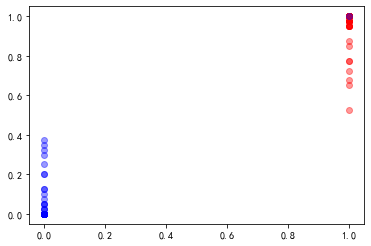

In [8]:
color1 = '#FF0000'
color2 = '#0000FF'
plt.scatter(y_predict[y_test==1],y_pred_proba[:,1][y_test==1],c=color1, alpha=0.4, label='正样本')
plt.scatter(y_predict[y_test==0],y_pred_proba[:,1][y_test==0],c=color2, alpha=0.4, label='负样本')
plt.show()

绘制ROC曲线并获得AUC指标。

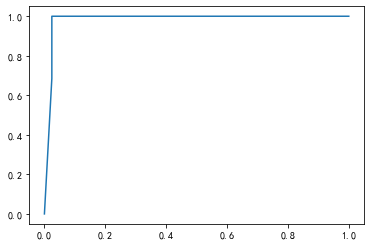

In [9]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve

fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.show()

In [10]:
# 查看AUC值
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.983962579351821


采用决策树桩作为基本分类器，探究随基本分类器个数变化，随机森林在测试集上准确率的变化。

In [11]:
lst = [1,5,10,20,30,40,50,60,70,80,90,100,200,500,1000]
score_list = []
for i in lst:
    model = RandomForestClassifier(max_depth=1, n_estimators=i, random_state=123)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = accuracy_score(y_predict,y_test)
    score_list.append(score)
    print(i,score)    

1 0.8859649122807017
5 0.9385964912280702
10 0.956140350877193
20 0.9473684210526315
30 0.9473684210526315
40 0.9473684210526315
50 0.9385964912280702
60 0.956140350877193
70 0.956140350877193
80 0.956140350877193
90 0.956140350877193
100 0.956140350877193
200 0.956140350877193
500 0.956140350877193
1000 0.956140350877193


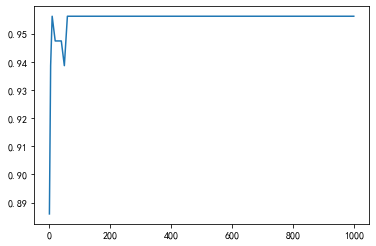

In [12]:
# 绘制准确率变化曲线图
plt.plot(lst, score_list)
plt.show()

## 4.实验结果分析

在测试集上的随机森林模型预测准确率为99.12%，能准确预测患者是否患有乳腺癌。

通过ROC曲线，可以看出绝大多数预测的$f(y)$都接近1。其AUC指标为0.9840，接近1.0。

决策树桩作为基本分类器，效果不及深度更高的随机森林模型。

随分类器个数的变化，模型预测准确率先上升，再下降，最终回归并稳定在下降前的高点值。分类器个数偏少时，模型的拟合能力不够，无法充分学习特征，准确率随模型个数上升而上升；分类器个数偏多时，模型过拟合，准确率下降，分类器个数达到某个点时，准确率上升至下降前的高点值，即使分类器个数增加，准确率依然保持不变。